In [1]:
# Breast Cancer Wisconsin (Diagnostic) Prediction with MLP neural network and KNN
# Dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Read data and EDA
data =  pd.read_csv("breast_cancer_dataset.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

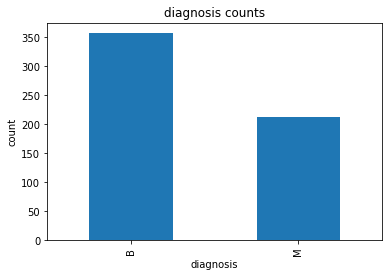

In [19]:
diag_counts = data.diagnosis.value_counts()
diag_counts.plot.bar()
plt.title('diagnosis counts')
plt.xlabel('diagnosis')
plt.ylabel('count')
plt.show()

In [3]:
# Data preprocessing
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})
data = data.drop(["id", "Unnamed: 32"], axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


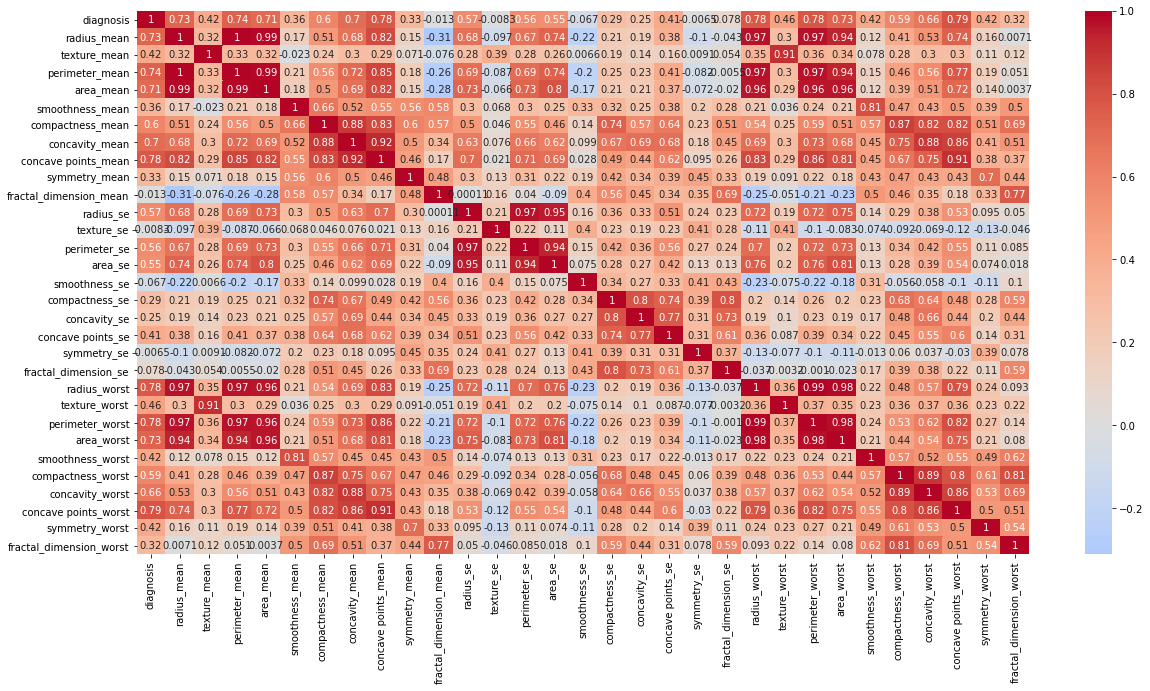

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm', center=0)
plt.show()

In [4]:
x = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
# Apply MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Construct MLP model and hyperparameter tuning
def create_model():
    input_layer = keras.Input(shape=(30,))
    hidden_1 = keras.layers.Dense(4, activation = 'relu')(input_layer)
    hidden_2 = keras.layers.Dense(4, activation = 'relu')(hidden_1)
    hidden_3 = keras.layers.Dense(4, activation = 'relu')(hidden_2)
    output_layer = keras.layers.Dense(1, activation='sigmoid')(hidden_3)
    model = keras.Model(input_layer, output_layer)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

batches = [32, 64, 128]
epochs = [500, 600]
param_grid = dict(batch_size=batches, epochs=epochs)
hp_model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)
grid = GridSearchCV(estimator = hp_model, param_grid = param_grid)
grid_result = grid.fit(X_train_scaled, y_train)
print("Best score: {}".format(grid_result.best_score_))
print("Best params: {}".format(grid_result.best_params_))

Best score: 0.9698417782783508
Best params: {'batch_size': 128, 'epochs': 500}


Epoch 1/500
4/4 [==============================] - 0s 54ms/step - loss: 0.6929 - accuracy: 0.6131 - val_loss: 0.6894 - val_accuracy: 0.6608
Epoch 2/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6895 - accuracy: 0.6131 - val_loss: 0.6858 - val_accuracy: 0.6608
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6863 - accuracy: 0.6131 - val_loss: 0.6825 - val_accuracy: 0.6608
Epoch 4/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6831 - accuracy: 0.6131 - val_loss: 0.6793 - val_accuracy: 0.6608
Epoch 5/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6803 - accuracy: 0.6131 - val_loss: 0.6759 - val_accuracy: 0.6608
Epoch 6/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6776 - accuracy: 0.6131 - val_loss: 0.6726 - val_accuracy: 0.6608
Epoch 7/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6748 - accuracy: 0.6131 - val_loss: 0.6691 - val_accuracy: 0.6608
Epoch 8/500
4/4 [=========

4/4 [==============================] - 0s 5ms/step - loss: 0.3516 - accuracy: 0.9171 - val_loss: 0.3306 - val_accuracy: 0.9298
Epoch 112/500
4/4 [==============================] - 0s 6ms/step - loss: 0.3497 - accuracy: 0.9221 - val_loss: 0.3316 - val_accuracy: 0.9240
Epoch 113/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3476 - accuracy: 0.9246 - val_loss: 0.3305 - val_accuracy: 0.9240
Epoch 114/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3460 - accuracy: 0.9271 - val_loss: 0.3290 - val_accuracy: 0.9240
Epoch 115/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3442 - accuracy: 0.9271 - val_loss: 0.3268 - val_accuracy: 0.9240
Epoch 116/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3424 - accuracy: 0.9271 - val_loss: 0.3255 - val_accuracy: 0.9298
Epoch 117/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3408 - accuracy: 0.9271 - val_loss: 0.3229 - val_accuracy: 0.9298
Epoch 118/500
4/4 [========

4/4 [==============================] - 0s 5ms/step - loss: 0.2285 - accuracy: 0.9573 - val_loss: 0.2058 - val_accuracy: 0.9474
Epoch 228/500
4/4 [==============================] - 0s 6ms/step - loss: 0.2272 - accuracy: 0.9598 - val_loss: 0.2084 - val_accuracy: 0.9649
Epoch 229/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2257 - accuracy: 0.9623 - val_loss: 0.2097 - val_accuracy: 0.9591
Epoch 230/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2252 - accuracy: 0.9598 - val_loss: 0.2079 - val_accuracy: 0.9649
Epoch 231/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2243 - accuracy: 0.9598 - val_loss: 0.2051 - val_accuracy: 0.9591
Epoch 232/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2243 - accuracy: 0.9573 - val_loss: 0.2027 - val_accuracy: 0.9474
Epoch 233/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2240 - accuracy: 0.9573 - val_loss: 0.2015 - val_accuracy: 0.9532
Epoch 234/500
4/4 [========

Epoch 285/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1942 - accuracy: 0.9673 - val_loss: 0.1691 - val_accuracy: 0.9649
Epoch 286/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1942 - accuracy: 0.9648 - val_loss: 0.1694 - val_accuracy: 0.9766
Epoch 287/500
4/4 [==============================] - 0s 6ms/step - loss: 0.1930 - accuracy: 0.9698 - val_loss: 0.1718 - val_accuracy: 0.9649
Epoch 288/500
4/4 [==============================] - 0s 7ms/step - loss: 0.1922 - accuracy: 0.9724 - val_loss: 0.1716 - val_accuracy: 0.9708
Epoch 289/500
4/4 [==============================] - 0s 7ms/step - loss: 0.1918 - accuracy: 0.9749 - val_loss: 0.1708 - val_accuracy: 0.9708
Epoch 290/500
4/4 [==============================] - 0s 7ms/step - loss: 0.1913 - accuracy: 0.9749 - val_loss: 0.1707 - val_accuracy: 0.9708
Epoch 291/500
4/4 [==============================] - 0s 7ms/step - loss: 0.1908 - accuracy: 0.9724 - val_loss: 0.1707 - val_accuracy: 0.9708
Epoch 292/500

4/4 [==============================] - 0s 5ms/step - loss: 0.1500 - accuracy: 0.9799 - val_loss: 0.1295 - val_accuracy: 0.9825
Epoch 402/500
4/4 [==============================] - 0s 6ms/step - loss: 0.1498 - accuracy: 0.9799 - val_loss: 0.1280 - val_accuracy: 0.9825
Epoch 403/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1523 - accuracy: 0.9698 - val_loss: 0.1279 - val_accuracy: 0.9766
Epoch 404/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1534 - accuracy: 0.9698 - val_loss: 0.1270 - val_accuracy: 0.9825
Epoch 405/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1516 - accuracy: 0.9724 - val_loss: 0.1264 - val_accuracy: 0.9766
Epoch 406/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1491 - accuracy: 0.9799 - val_loss: 0.1276 - val_accuracy: 0.9825
Epoch 407/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1481 - accuracy: 0.9824 - val_loss: 0.1311 - val_accuracy: 0.9825
Epoch 408/500
4/4 [========

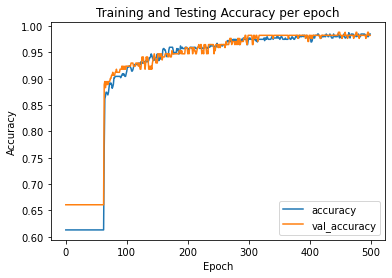

In [14]:
# Results
hist = create_model().fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=500, batch_size=128, verbose=1)
print("Best accuracy: {}".format(max(hist.history['accuracy'])))
print("Best validation accuracy: {}".format(max(hist.history['val_accuracy'])))
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Training and Testing Accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['accuracy','val_accuracy'])
plt.show()

Best K value: 2


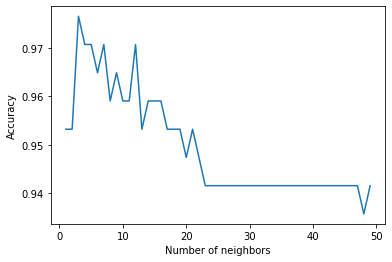

Highest accuracy: 0.9766081871345029


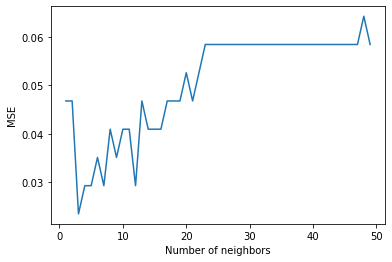

Lowest error: 0.023391812865497075


In [20]:
#apply KNN Classifier
n = []
scores = []
preds_Y = []
MSE = []
for i in range(1,50):
    n.append(i)
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train) 
    scores.append(knn.score(X_test_scaled, y_test))
    y_preds = knn.predict(X_test_scaled)
    MSE.append(metrics.mean_squared_error(y_test, y_preds))

#plot accuracy
print("Best K value: {}".format(scores.index(max(scores))))
plt.plot(n, scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
print("Highest accuracy:", max(scores))
plt.plot(n, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('MSE')
plt.show()
print("Lowest error:", min(MSE))